In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'pandas'

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option("max_colwidth", None)

In [ ]:
df = pd.read_csv('notebook\data\laptop_data.csv')

In [4]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


# Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [8]:
df.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0
Weight,0


In [9]:
df.Ram.value_counts()

,count
Ram,
8GB,619
4GB,375
16GB,200
6GB,41
12GB,25
2GB,22
32GB,17
24GB,3
64GB,1


In [10]:
df["Ram"] = df["Ram"].str.replace("GB", "")

In [11]:
df.Ram.value_counts()

,count
Ram,
8,619
4,375
16,200
6,41
12,25
2,22
32,17
24,3
64,1


In [12]:
df["Weight"].str.replace("\d{1}\.?\d{0,}?","",regex=True).value_counts()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2544598505.py:1: SyntaxWarning: invalid escape sequence '\d'
  df["Weight"].str.replace("\d{1}\.?\d{0,}?","",regex=True).value_counts()


,count
Weight,
kg,1303


In [13]:
df["Weight"] = df["Weight"].str.replace("kg", "")

In [14]:
df["Weight"]

,Weight
0,1.37
1,1.34
2,1.86
3,1.83
4,1.37
...,...
1298,1.8
1299,1.3
1300,1.5
1301,2.19


In [15]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1223,Dell,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.26,91288.3536
1040,Lenovo,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,256GB SSD,Intel HD Graphics 520,Windows 10,1.8,45128.1600
733,Acer,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,2.4,29783.5200
285,Acer,Notebook,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12,1TB HDD,Intel HD Graphics 620,Windows 10,2.15,35111.5200
954,Lenovo,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 6600U 2.6GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.7,79333.3872


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [17]:
df["Ram"] = df["Ram"].astype(int)
df["Weight"] = df["Weight"].astype(float)

# Feature Engineering

1.  ScreenResolution =>
      1. IPS, Touch Screen, PPI (pixelperindex)

In [18]:
## ips
df["ips"] = df["ScreenResolution"].apply(lambda x: 1 if "IPS" in x else 0)

In [19]:
df["ips"].value_counts()

,count
ips,
0,938
1,365


In [20]:
## touch screen

df["touch_screen"] = df["ScreenResolution"].apply(lambda x: 1 if "Touchscreen" in x else 0)

In [21]:
df["touch_screen"].value_counts()

,count
touch_screen,
0,1111
1,192


In [22]:
## ppi => (xres**2 + yres**2) / inches
df[["x_res", "y_res"]] = df["ScreenResolution"].str.split("x", n=1, expand =True)

In [23]:
df['x_res'] = df['x_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [24]:
df["y_res"].head()

,y_res
0,1600
1,900
2,1080
3,1800
4,1600


In [25]:
df['x_res'] = df['x_res'].astype('int')
df['y_res'] = df['y_res'].astype('int')

In [26]:
df['ppi'] = (((df['x_res']**2) + (df['y_res']**2))**0.5/df['Inches']).astype('float')

In [27]:
df['ppi'].head()

,ppi
0,226.983005
1,127.677940
2,141.211998
3,220.534624
4,226.983005


In [28]:
df.drop(columns= ["x_res", "y_res", "Inches", "ScreenResolution"], inplace=True)

In [29]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ips,touch_screen,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,226.983005


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       1303 non-null   object 
 1   TypeName      1303 non-null   object 
 2   Cpu           1303 non-null   object 
 3   Ram           1303 non-null   int64  
 4   Memory        1303 non-null   object 
 5   Gpu           1303 non-null   object 
 6   OpSys         1303 non-null   object 
 7   Weight        1303 non-null   float64
 8   Price         1303 non-null   float64
 9   ips           1303 non-null   int64  
 10  touch_screen  1303 non-null   int64  
 11  ppi           1303 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 122.3+ KB


In [31]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [32]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'


df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [33]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [34]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,ips,touch_screen,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,226.983005,Intel Core i5


In [35]:
df["Memory"].value_counts()

,count
Memory,
256GB SSD,412
1TB HDD,223
500GB HDD,132
512GB SSD,118
128GB SSD + 1TB HDD,94
128GB SSD,76
256GB SSD + 1TB HDD,73
32GB Flash Storage,38
2TB HDD,16


In [36]:
ssd_match = df["Memory"].str.extract(r'(\d+)(GB|TB)\sSSD')

# convert TB to GB, keep GB as is
df["ssd"] = np.where(
    ssd_match[1] == "TB",
    ssd_match[0].astype(float) * 1024,  # TB → GB
    ssd_match[0].astype(float)          # GB stays as number
)


In [37]:
hdd_match = df["Memory"].str.extract(r'(\d+)(GB|TB)\sHybrid')

df["hdd"] = np.where(
    hdd_match[1] == "TB",
    hdd_match[0].astype(float) * 1024,  # TB → GB
    hdd_match[0].astype(float)          # GB stays as number
)

In [38]:
hdd_match = df["Memory"].str.extract(r'(\d+(?:\.\d+)?)(GB|TB)\s(?:HDD|Hybrid)')
df["hdd"] = np.where(
    hdd_match[1] == "TB",
    hdd_match[0].astype(float) * 1024,
    hdd_match[0].astype(float)
)

In [39]:
flash_match = df["Memory"].str.extract(r'(\d+(?:\.\d+)?)(GB|TB)\sFlash')

df["flash"] = np.where(
    flash_match[1] == "TB",
    flash_match[0].astype(float) * 1024,  # TB → GB
    flash_match[0].astype(float)
)

In [40]:
df["hdd"].isnull().sum()

np.int64(715)

In [41]:
df.drop(columns=['Memory'],inplace=True)

In [42]:
df.fillna(0, inplace=True)

In [43]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,ips,touch_screen,ppi,Cpu brand,ssd,hdd,flash
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,226.983005,Intel Core i5,128.0,0.0,0.0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0.0,0.0,128.0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256.0,0.0,0.0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,220.534624,Intel Core i7,512.0,0.0,0.0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,226.983005,Intel Core i5,256.0,0.0,0.0


In [44]:
df[['ssd', 'hdd', 'flash']]=df[['ssd', 'hdd', 'flash']].astype('int')

In [45]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,ips,touch_screen,ppi,Cpu brand,ssd,hdd,flash
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,226.983005,Intel Core i5,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,220.534624,Intel Core i7,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,226.983005,Intel Core i5,256,0,0


In [46]:
df["gpu_name"] = df["Gpu"].str.split(" ", n=1, expand =True)[0]

In [47]:
df = df[df['gpu_name'] != 'ARM']

In [48]:
df.gpu_name.value_counts()

,count
gpu_name,
Intel,722
Nvidia,400
AMD,180


In [49]:
df.drop(columns=['Gpu'],inplace=True)

In [50]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'
df['os'] = df['OpSys'].apply(cat_os)

In [51]:
df["os"].value_counts()

,count
os,
Windows,1125
Others/No OS/Linux,156
Mac,21


In [52]:
df.drop(columns=['OpSys'],inplace=True)

# Analysis

In [ ]:
!pip install ydata_profiling

In [53]:
from ydata_profiling import ProfileReport

In [54]:
report = ProfileReport(df)

In [55]:
report.to_file(output_file= '/content/drive/MyDrive/Practice projects/laptop price prediction/ydata_profile_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 14/14 [00:00<00:00, 38.05it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Outlier Treatment

In [56]:
df.columns = df.columns.str.lower()

In [57]:
## price
df["price"] = df["price"].astype(int)

In [58]:
df["price"].describe()

,price
count,1302.000000
mean,59888.555300
std,37251.180578
min,9270.000000
25%,31914.000000
50%,52107.500000
75%,79303.500000
max,324954.000000


/tmp/ipython-input-50337492.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["price"])


<Axes: xlabel='price', ylabel='Density'>

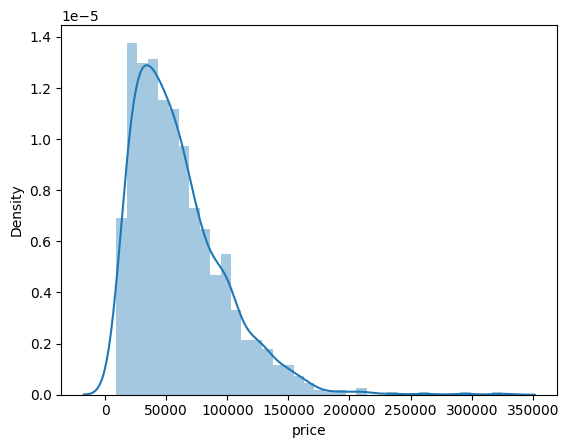

In [59]:
sns.distplot(df["price"])

<Axes: xlabel='price'>

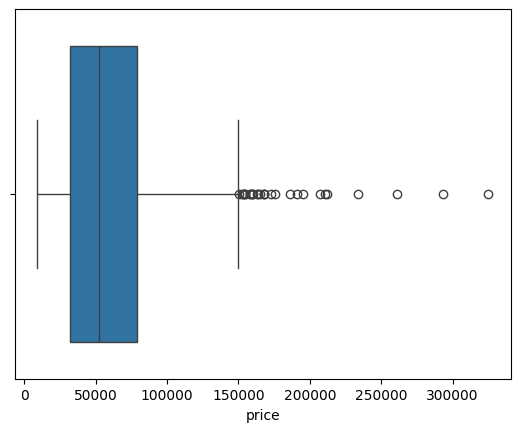

In [60]:
sns.boxplot(x=df["price"])

In [61]:
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

(np.float64(-39170.25), np.float64(150387.75))

In [62]:
df[(df["price"] < lower_bound) | (df["price"] > upper_bound)].sort_values(by="price", ascending=False)

,company,typename,ram,weight,price,ips,touch_screen,ppi,cpu brand,ssd,hdd,flash,gpu_name,os
196,Razer,Gaming,32,3.49,324954,0,1,254.671349,Intel Core i7,1024,0,0,Nvidia,Windows
830,Razer,Gaming,32,3.49,292986,0,1,254.671349,Intel Core i7,512,0,0,Nvidia,Windows
610,Lenovo,Notebook,32,2.50,261018,1,0,282.423996,Other Intel Processor,1024,0,0,Nvidia,Windows
749,HP,Workstation,16,3.00,233845,1,0,127.335675,Other Intel Processor,256,0,0,Nvidia,Windows
1066,Asus,Gaming,64,3.58,211788,1,0,127.335675,Intel Core i7,1024,0,0,Nvidia,Windows
1136,HP,Workstation,8,3.00,210424,1,0,127.335675,Intel Core i7,256,0,0,Nvidia,Windows
238,Asus,Gaming,32,4.70,207259,0,0,127.335675,Intel Core i7,512,1024,0,Nvidia,Windows
723,Dell,Gaming,32,4.36,194972,0,0,254.671349,Intel Core i7,1024,1024,0,Nvidia,Windows
780,Dell,Gaming,32,4.42,191211,1,0,127.335675,Intel Core i7,1024,1024,0,Nvidia,Windows
1231,Razer,Gaming,16,1.95,186426,0,0,157.350512,Intel Core i7,1024,0,0,Nvidia,Windows


In [63]:
df[(df["price"] < lower_bound) | (df["price"] > 172627)].shape

(11, 14)

In [64]:
df = df[~((df["price"] < lower_bound) | (df["price"] > upper_bound))]

# Missing Values

In [65]:
df.isnull().sum()

,0
company,0
typename,0
ram,0
weight,0
price,0
ips,0
touch_screen,0
ppi,0
cpu brand,0
ssd,0


/tmp/ipython-input-50337492.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["price"])


<Axes: xlabel='price', ylabel='Density'>

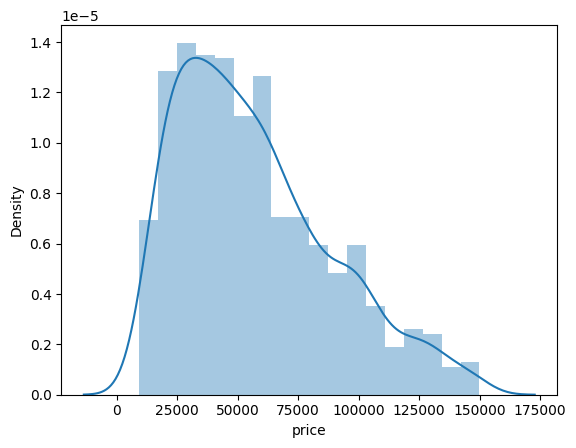

In [66]:
sns.distplot(df["price"])

In [67]:
df["price"] = np.log(df["price"])

/tmp/ipython-input-145649480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["price"] = np.log(df["price"])


/tmp/ipython-input-50337492.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["price"])


<Axes: xlabel='price', ylabel='Density'>

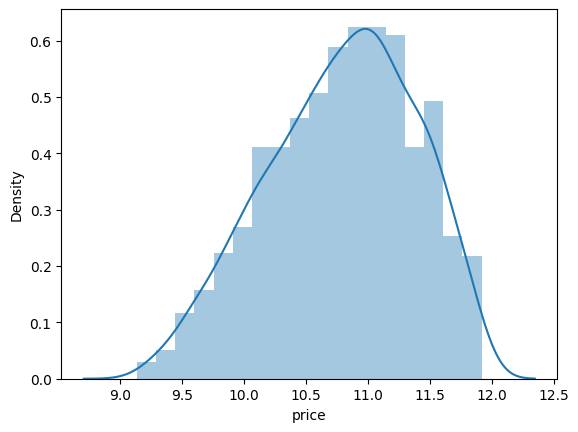

In [68]:
sns.distplot(df["price"])

# Feature Selection

In [69]:
from sklearn.preprocessing import OrdinalEncoder

In [70]:
## encoding
data_label_encoded = df.copy()

cat_cols = data_label_encoded.select_dtypes(include=['object']).columns

for col in cat_cols:
  oe = OrdinalEncoder()
  data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

In [71]:
X_label

,company,typename,ram,weight,ips,touch_screen,ppi,cpu brand,ssd,hdd,flash,gpu_name,os
0,1.0,4.0,8,1.37,1,0,226.983005,2.0,128,0,0,1.0,0.0
1,1.0,4.0,8,1.34,0,0,127.677940,2.0,0,0,128,1.0,0.0
2,7.0,3.0,8,1.86,0,0,141.211998,2.0,256,0,0,1.0,1.0
3,1.0,4.0,16,1.83,1,0,220.534624,3.0,512,0,0,0.0,0.0
4,1.0,4.0,8,1.37,1,0,226.983005,2.0,256,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,10.0,0.0,4,1.80,1,1,157.350512,3.0,128,0,0,1.0,2.0
1299,10.0,0.0,16,1.30,1,1,276.053530,3.0,512,0,0,1.0,2.0
1300,10.0,3.0,2,1.50,0,0,111.935204,4.0,0,0,64,1.0,2.0
1301,7.0,3.0,6,2.19,0,0,100.454670,3.0,0,1024,0,0.0,2.0


In [72]:
y_label

,price
0,11.175745
1,10.776766
2,10.329931
3,11.814473
4,11.473093
...,...
1298,10.433880
1299,11.288106
1300,9.409273
1301,10.614106


# Technique 1 : Correclation

In [73]:
fi_df1 = data_label_encoded.corr()['price'].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,company,0.147182
1,typename,-0.120621
2,ram,0.685788
3,weight,0.069839
4,price,1.000000
5,ips,0.270313
6,touch_screen,0.209260
7,ppi,0.477932
8,cpu brand,0.148061
9,ssd,0.647819


### Technique 2 - Random Forest Feature Importance

In [74]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_label, y_label)

fi_df2 = pd.DataFrame({
    "feature": X_label.columns,
    "rf_importance": rf.feature_importances_
}).sort_values(by="rf_importance", ascending=False).reset_index(drop=True)

In [75]:
fi_df2

,feature,rf_importance
0,ram,0.576643
1,cpu brand,0.122580
2,weight,0.097475
3,ppi,0.072574
4,ssd,0.030269
5,typename,0.026197
6,company,0.025422
7,os,0.016941
8,gpu_name,0.010348
9,ips,0.007012


### Technique 3 - Gradient Boosting Feature importances

In [76]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb.fit(X_label, y_label)

fi_df3 = pd.DataFrame({
    "feature": X_label.columns,
    "gb_importance": gb.feature_importances_
}).sort_values(by="gb_importance", ascending=False).reset_index(drop=True)

In [77]:
fi_df3

,feature,gb_importance
0,ram,0.521068
1,cpu brand,0.143365
2,ssd,0.114520
3,ppi,0.069170
4,weight,0.060095
5,typename,0.033160
6,os,0.017034
7,gpu_name,0.014631
8,company,0.012856
9,flash,0.005717


### Technique 4 - Permutation Importance

In [78]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
2,ram,0.470242
7,cpu brand,0.277476
3,weight,0.082684
6,ppi,0.059635
8,ssd,0.054236
12,os,0.029899
0,company,0.021278
1,typename,0.014231
11,gpu_name,0.008340
9,hdd,0.008129


### Technique 5 - LASSO

In [79]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X_label)
lasso = Lasso(alpha = 0.01)
lasso.fit(X_scaled, y_label)


# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
2,ram,0.238359
8,ssd,0.170396
6,ppi,0.107276
11,gpu_name,0.087776
12,os,0.054380
4,ips,0.021772
0,company,0.021664
10,flash,0.016475
1,typename,0.014173
9,hdd,0.009423


### Technique 6 - RFE => Recursive Feature Elimination

In [80]:
from sklearn.feature_selection import RFE

estimator = RandomForestRegressor()

selector = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector = selector.fit(X_label, y_label)

selected_features = X_label.columns[selector.support_]

selected_coeffs = selector.estimator_.feature_importances_



fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coeffs
}).sort_values(by='rfe_score', ascending=False)

fi_df6


,feature,rfe_score
2,ram,0.568450
7,cpu brand,0.122782
3,weight,0.097959
6,ppi,0.071974
8,ssd,0.035995
1,typename,0.028378
0,company,0.025732
12,os,0.017451
11,gpu_name,0.009988
9,hdd,0.007327


### Technique 7 - Linear Regression Weights

In [81]:
from sklearn.linear_model import LinearRegression
# Train a linear regression model on the label-encoded and standardized training data
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7


,feature,reg_coeffs
2,ram,0.226047
8,ssd,0.192707
6,ppi,0.116618
11,gpu_name,0.099129
12,os,0.067101
10,flash,0.040891
1,typename,0.038902
0,company,0.033152
9,hdd,0.032889
4,ips,0.028083


In [82]:
fi_df5.nunique()

,0
feature,13
lasso_coeff,13


### Technique 8 - SHAP

In [83]:
!pip install shap

In [84]:
import shap

rf = RandomForestRegressor(n_estimators = 100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

shap_sum = np.abs(shap_values).mean(axis=0)
shap_values


array([[-4.02069266e-03,  2.09828610e-02,  1.35710827e-01, ...,
         8.23324105e-05, -2.80372448e-03, -7.45983190e-02],
       [-6.04767407e-02,  2.86098389e-02,  9.00019865e-02, ...,
        -1.26536877e-02, -4.58066058e-03, -6.69953753e-02],
       [-1.54674811e-02, -3.23814866e-02,  8.58484691e-02, ...,
         2.16126528e-04, -3.40289900e-02, -1.84822616e-01],
       ...,
       [-9.01466975e-03, -9.80101650e-03, -6.71883323e-01, ...,
        -2.58279436e-02, -3.83700372e-03,  1.10622682e-02],
       [ 1.74972751e-02, -1.17061015e-02, -2.48210113e-01, ...,
         7.27996364e-04, -1.10017735e-02,  3.78161874e-02],
       [-1.39919900e-02, -1.44548769e-02, -4.12355067e-01, ...,
         4.05010701e-03, -8.21279163e-03,  4.03065289e-02]])

In [85]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
2,ram,0.282033
7,cpu brand,0.125306
3,weight,0.088811
6,ppi,0.067992
8,ssd,0.060014
12,os,0.035797
0,company,0.024854
1,typename,0.023981
11,gpu_name,0.013065
9,hdd,0.007781


In [86]:
fi_df1, fi_df2, fi_df3, fi_df4, fi_df5, fi_df6, fi_df7, fi_df8,

(         feature  corr_coeff
 0        company    0.147182
 1       typename   -0.120621
 2            ram    0.685788
 3         weight    0.069839
 4          price    1.000000
 5            ips    0.270313
 6   touch_screen    0.209260
 7            ppi    0.477932
 8      cpu brand    0.148061
 9            ssd    0.647819
 10           hdd   -0.091625
 11         flash   -0.053565
 12      gpu_name    0.337036
 13            os    0.217964,
          feature  rf_importance
 0            ram       0.576643
 1      cpu brand       0.122580
 2         weight       0.097475
 3            ppi       0.072574
 4            ssd       0.030269
 5       typename       0.026197
 6        company       0.025422
 7             os       0.016941
 8       gpu_name       0.010348
 9            ips       0.007012
 10           hdd       0.006938
 11  touch_screen       0.005399
 12         flash       0.002202,
          feature  gb_importance
 0            ram       0.521068
 1      cpu brand   

In [87]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [88]:
final_fi_df.shape

(13, 8)

In [89]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
company,0.147182,0.025422,0.012856,0.021278,0.021664,0.025732,0.033152,0.024854
typename,-0.120621,0.026197,0.033160,0.014231,0.014173,0.028378,0.038902,0.023981
ram,0.685788,0.576643,0.521068,0.470242,0.238359,0.568450,0.226047,0.282033
weight,0.069839,0.097475,0.060095,0.082684,0.001358,0.097959,0.019732,0.088811
ips,0.270313,0.007012,0.000340,0.003248,0.021772,0.006518,0.028083,0.006889
touch_screen,0.209260,0.005399,0.004459,-0.004709,-0.000000,0.005327,0.012045,0.004726
ppi,0.477932,0.072574,0.069170,0.059635,0.107276,0.071974,0.116618,0.067992
cpu brand,0.148061,0.122580,0.143365,0.277476,-0.026822,0.122782,-0.041591,0.125306
ssd,0.647819,0.030269,0.114520,0.054236,0.170396,0.035995,0.192707,0.060014


In [90]:
## normalize => row[col]/sumof col
final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
company,0.049971,0.025422,0.012856,0.020765,0.030247,0.025732,0.038295,0.033458
typename,-0.040953,0.026197,0.033160,0.013888,0.019788,0.028378,0.044936,0.032282
ram,0.232835,0.576643,0.521068,0.458901,0.332797,0.568450,0.261113,0.379666
weight,0.023711,0.097475,0.060095,0.080690,0.001895,0.097959,0.022793,0.119555
ips,0.091775,0.007012,0.000340,0.003170,0.030398,0.006518,0.032439,0.009273
touch_screen,0.071047,0.005399,0.004459,-0.004596,-0.000000,0.005327,0.013914,0.006363
ppi,0.162265,0.072574,0.069170,0.058197,0.149779,0.071974,0.134709,0.091529
cpu brand,0.050269,0.122580,0.143365,0.270785,-0.037450,0.122782,-0.048043,0.168684
ssd,0.219944,0.030269,0.114520,0.052928,0.237907,0.035995,0.222601,0.080789


In [91]:
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [92]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

,0
feature,
ram,0.500946
cpu brand,0.165639
weight,0.091155
ppi,0.072689
ssd,0.062900
typename,0.026781
os,0.025759
company,0.023647
gpu_name,0.012139


In [93]:
## dropping the last two features but first let build a normal model with this
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score


rfr = RandomForestRegressor(n_estimators=100, random_state=42)

score1 = cross_val_score(rfr, X_label, y_label, scoring='r2', cv=5)

score1.mean()



np.float64(0.8450218005910349)

In [94]:
rfr2 = RandomForestRegressor(n_estimators=100, random_state=42)

scores2 = cross_val_score(rfr2, X_label.drop(columns=["touch_screen", "flash", "ips"]), y_label, scoring='r2', cv=5)

In [95]:
df.drop(columns=["touch_screen", "flash", "ips"], inplace=True)

/tmp/ipython-input-2244923570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["touch_screen", "flash", "ips"], inplace=True)


In [96]:
scores2.mean()

np.float64(0.8406574587331261)

- hence no affect on the result after dropping cols

In [97]:
df.shape

(1273, 11)

## Model Selection

- will try multiple encodings like ordinal, target encoder
- do scaling on the num cols

In [98]:
X = df.drop(columns=['price'])
y = df['price']

In [99]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.7 MB/s eta 0:00:00


In [117]:
from sklearn.model_selection import cross_val_predict, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error, make_scorer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from category_encoders import TargetEncoder
from sklearn.pipeline import Pipeline

In [101]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   company    1273 non-null   object 
 1   typename   1273 non-null   object 
 2   ram        1273 non-null   int64  
 3   weight     1273 non-null   float64
 4   ppi        1273 non-null   float64
 5   cpu brand  1273 non-null   object 
 6   ssd        1273 non-null   int64  
 7   hdd        1273 non-null   int64  
 8   gpu_name   1273 non-null   object 
 9   os         1273 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 109.4+ KB


In [102]:
cat_columns=[x for x in X.columns if X[x].dtype == 'object']
num_columns = [x for x in X.columns if X[x].dtype != 'object']

In [103]:
#1 column_transformer => cat and num (scaling
ordinal_preprocessor = ColumnTransformer(transformers = [("cat_encode", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), cat_columns),
("num_scale", StandardScaler(), num_columns)],
remainder="passthrough")

target_preprocessor = ColumnTransformer(transformers = [("cat_encode", TargetEncoder(cols=cat_columns), cat_columns),
("num_scale", StandardScaler(), num_columns)],
remainder="passthrough")

In [111]:
models = {
    "linear_regression" : LinearRegression(),
    "random_forest" : RandomForestRegressor(),
    "gradient_boosting" : GradientBoostingRegressor(),
    "svr" : SVR(),
    "xgboost" : XGBRegressor()
}

In [132]:
#2 eval func with pipeline


def evaluate_pipeline(preprocessor,model, X, y):

  results = []

  kf = KFold(n_splits=5, shuffle=True, random_state=42)

  for name, model in models.items():
    pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])

    y_pred = cross_val_predict(pipeline, X, y, cv=kf, n_jobs=-1)

    r2 = r2_score(y,y_pred)

    mae = mean_absolute_error(y,y_pred)

    results.append((name, r2, mae))

  return pd.DataFrame(results, columns=["Model", "R2", "MAE"])





In [136]:
#3 loop through each encoder

ordinal_results = evaluate_pipeline(ordinal_preprocessor, models, X, y)
target_results = evaluate_pipeline(target_preprocessor, models, X, y)

In [140]:
ordinal_results.sort_values(by="R2", ascending=False)

,Model,R2,MAE
4,xgboost,0.877930,0.155029
2,gradient_boosting,0.873588,0.168090
1,random_forest,0.870508,0.162951
3,svr,0.808881,0.204028
0,linear_regression,0.627466,0.293664


- so we select 2 models for hyper parameter training

1. XGBoost
2. Gradient Boosting
3. Random Forest

# hyper parameter Tuning

In [126]:
def hyperparameter_tuning(preprocessor, model, param_grid, X, y):
  pipeline = Pipeline(steps=[("preprocessor" , preprocessor),
      ("model", model)])
  cv = KFold(n_splits=5, random_state=42, shuffle=True)
  grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring="r2")
  scoring = {'r2': 'r2',
             'mae': make_scorer(mean_absolute_error, greater_is_better=False)}
   # GridSearchCV
  grid = GridSearchCV(
      estimator=pipeline,
      param_grid=param_grid,
      cv=cv,
      scoring=scoring,
      refit='r2',
      n_jobs=-1)

  grid.fit(X, y)

  # results dataframe
  best_params = grid.best_params_


  return best_params, grid.best_estimator_

In [130]:
model_dict = {
    "xgbr" : XGBRegressor(random_state=42),
    "gbr" : GradientBoostingRegressor(),
    "rfr" : RandomForestRegressor()
}

param_grid_dict = {
    "xgbr" : {
        'model__n_estimators': [300, 500],
        'model__learning_rate': [0.05, 0.1],
        'model__max_depth': [3, 5],
        'model__subsample': [0.8, 1.0],
        'model__colsample_bytree': [0.8, 1.0]},

    "gbr": {
        'model__n_estimators': [300, 500],
        'model__learning_rate': [0.05, 0.1],
        'model__max_depth': [3, 5],
        'model__subsample': [0.8, 1.0],
        'model__max_features': ['sqrt', None]
    },

    "rfr" : {
        'model__n_estimators': [300, 500],
        'model__max_depth': [None, 10, 20],
        'model__min_samples_split': [2, 5],
        'model__min_samples_leaf': [1, 2],
        'model__max_features': ['sqrt', 'log2']
    }

    }

- With Ordinal Encoder

In [131]:
results = {}
all_best_models = {}

for name, model in model_dict.items():
  result_df, best_model = hyperparameter_tuning(ordinal_preprocessor, model, param_grid_dict[name], X, y)

  results[name] = result_df
  all_best_models[name] = best_model


- with Target Encoder

In [141]:
target_results = {}
target_all_best_models = {}

for name, model in model_dict.items():
  result_df, best_model = hyperparameter_tuning(target_preprocessor, model, param_grid_dict[name], X, y)

  target_results[name] = result_df
  target_all_best_models[name] = best_model

In [152]:
for i in all_best_models:
  print(i)
  print(all_best_models[i])

xgbr
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_encode',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['company', 'typename',
                                                   'cpu brand', 'gpu_name',
                                                   'os']),
                                                 ('num_scale', StandardScaler(),
                                                  ['ram', 'weight', 'ppi',
                                                   'ssd', 'hdd'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow

## Final :
- After Hyperparameter Tuning we come to end with XGBR with Ordinal Encoder

In [156]:
best_pipe = all_best_models["xgbr"]

# Exporting the model

In [155]:
import pickle

In [157]:
X

,company,typename,ram,weight,ppi,cpu brand,ssd,hdd,gpu_name,os
0,Apple,Ultrabook,8,1.37,226.983005,Intel Core i5,128,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,141.211998,Intel Core i5,256,0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,220.534624,Intel Core i7,512,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,226.983005,Intel Core i5,256,0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,157.350512,Intel Core i7,128,0,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,276.053530,Intel Core i7,512,0,Intel,Windows
1300,Lenovo,Notebook,2,1.50,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,100.454670,Intel Core i7,0,1024,AMD,Windows


In [158]:
with open('/content/drive/MyDrive/Practice projects/laptop price prediction/pipeline.pkl', "wb") as file:
  pickle.dump(best_pipe, file)

with open('/content/drive/MyDrive/Practice projects/laptop price prediction/df.pkl', "wb") as file2:
  pickle.dump(X, file2)

## lets do some prediction

In [162]:
X.iloc[0].values

array(['Apple', 'Ultrabook', np.int64(8), np.float64(1.37),
       np.float64(226.98300468106115), 'Intel Core i5', np.int64(128),
       np.int64(0), 'Intel', 'Mac'], dtype=object)

In [160]:
X.columns

Index(['company', 'typename', 'ram', 'weight', 'ppi', 'cpu brand', 'ssd',
       'hdd', 'gpu_name', 'os'],
      dtype='object')

In [163]:
columns =['company', 'typename', 'ram', 'weight', 'ppi', 'cpu brand', 'ssd',
       'hdd', 'gpu_name', 'os']
test_data = [['Apple', 'Ultrabook', np.int64(8), np.float64(1.37),
       np.float64(226.98300468106115), 'Intel Core i5', np.int64(128),
       np.int64(0), 'Intel', 'Mac']]

In [164]:
test_df = pd.DataFrame(test_data, columns=columns)

In [165]:
test_df

,company,typename,ram,weight,ppi,cpu brand,ssd,hdd,gpu_name,os
0,Apple,Ultrabook,8,1.37,226.983005,Intel Core i5,128,0,Intel,Mac


In [170]:
# predict => raise to exp => int

int(np.expm1(best_pipe.predict(test_df)[0]))

72809